<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Good)</span></div>

# What to expect in this chapter

# 1 Some nomenclature

Tldr:
1. Figure is the entire image/area where we add smaller graphs, diagrams to
2. Axis is the individual mathematical axis that we use for plotting

As such, one figure can have multiple axes (Think figures and individual panels of research papers)

# 2 Comparing the two ‘dialects’

In [3]:
from matplotlib import pyplot as plt
import numpy as np

x = np.linspace(-np.pi, np.pi, 10000)
cos_x = np.cos(x)
sin_x = np.sin(x)

### pyplot Interface

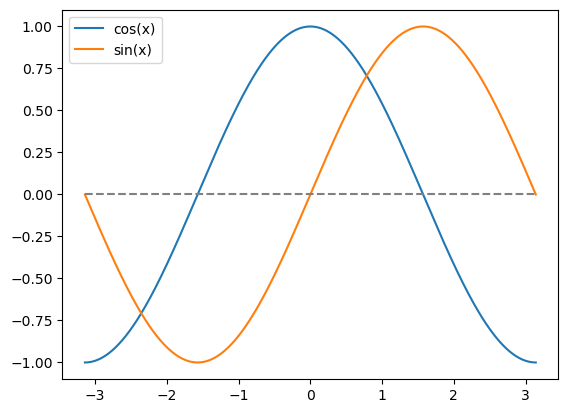

In [9]:
plt.plot(x, cos_x, label = 'cos(x)')
plt.plot(x, sin_x, label = 'sin(x)')
plt.hlines(0,-np.pi,np.pi, linestyle='--', colors='grey')
plt.legend()

plt.show()

### OO Interface

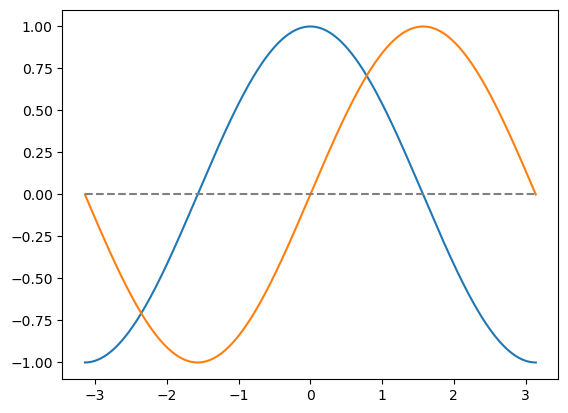

In [16]:
#Object-oriented interface

fig, ax = plt.subplots(nrows=1, ncols=1)      #Create a fig with 1 x and 1 y-axis (ie one panel)
ax.plot(x, cos_x, label = 'cos(x)')
ax.plot(x, sin_x, label = 'sin(x)')
ax.hlines(0,-np.pi,np.pi, linestyle='--', colors='grey')

# 3 What is OO ax, really?

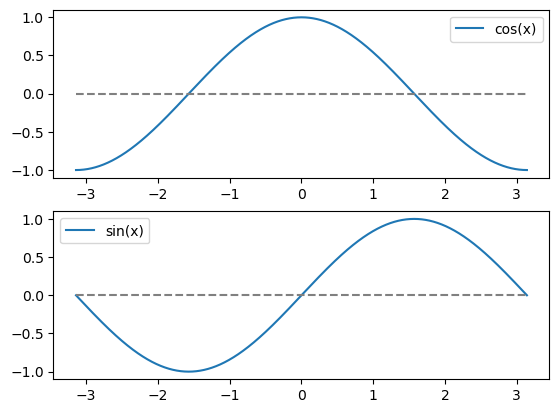

In [18]:
fig, ax = plt.subplots(nrows=2, ncols = 1)        # 1 Figure, 2 panels that are stacked vertically (2x1)
                                                  # This gives you 2 axes to plot in both panels
x = np.linspace(-np.pi, np.pi, 10000)
cos_x = np.cos(x)
sin_x = np.sin(x)

ax[0].plot(x, cos_x, label='cos(x)')
ax[1].plot(x, sin_x, label='sin(x)')

ax[0].hlines(0,-np.pi,np.pi, linestyle='--', colors='grey')
ax[1].hlines(0,-np.pi,np.pi, linestyle='--', colors='grey')

ax[0].legend()
ax[1].legend()

In [22]:
type(ax)        #ax is a numpy array!
ax.shape        #ax has 2 'things'
type(ax[0])     # Matplotlib axis

matplotlib.axes._axes.Axes

# 4 A complete OO example

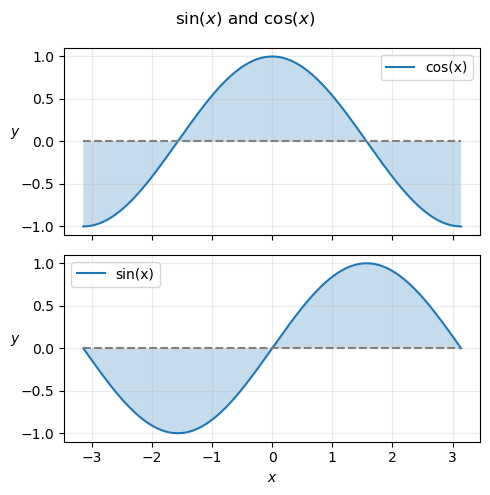

In [28]:
from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots (nrows=2, ncols=1,                      # Give me two axes (2 panels) in one figure (2x1)
                       figsize=(5,5),                          # Give me a large figure
                       sharex = True)                          # Both plots are to share the same x-axis

x = np.linspace(-np.pi, np.pi, 10000)
cos_x = np.cos(x)
sin_x = np.sin(x)

ax[0].plot(x, cos_x, label='cos(x)')                           # ax is a numpy array with 2 axes, index using [0] and [1]
ax[0].hlines(0,-np.pi,np.pi, linestyle='--', colors='grey')
ax[0].fill_between(x, 0, cos_x, alpha=.25)                     # use fill_between to fill the plots.   
                                                               # access the axes by indexing the numpy array
ax[1].plot(x, sin_x, label='sin(x)')
ax[1].hlines(0,-np.pi,np.pi, linestyle='--', colors='grey')
ax[1].fill_between(x, 0, sin_x, alpha=.25)

for a in ax:                                                   # Use a for loop that iterates through the numpy array ax
    a.legend()
    a.grid(alpha=.25)
    a.set_ylabel('$y$', rotation=0)
     
ax[1].set_xlabel('$x$')                                        # Only the bottom x-axis needs to be labelled since it is shared

fig.suptitle(r'$\sin(x)$ and $\cos(x)$')                       # Add a supertitle to the figure (not the plots)
fig.tight_layout()                                             # Make my figure look nice

# 5 Multiple rows and columns

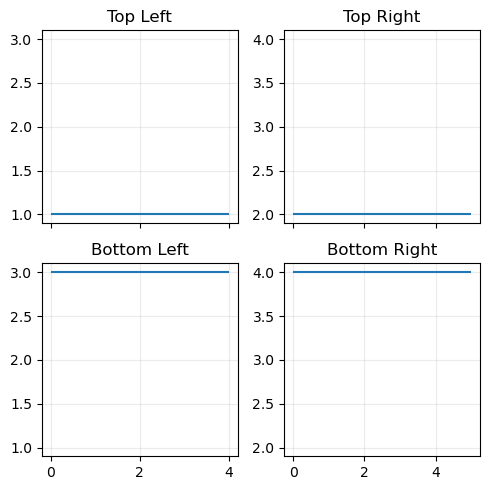

In [29]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex='col', sharey='col')

# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

### Using ax

(2, 2)


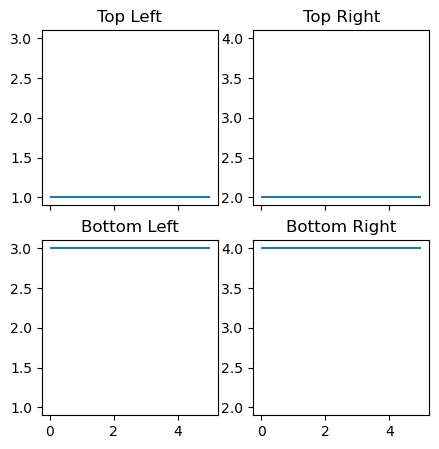

In [33]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex='col', sharey='col')

print(ax.shape)                                                      # (2,2) showing a 2x2 array

ax[0, 0].set_title('Top Left')
ax[0, 1].set_title('Top Right')
ax[1, 0].set_title('Bottom Left')
ax[1, 1].set_title('Bottom Right')

top_left=ax[0, 0]                                                    # Also works, js assigning variables
top_right=ax[0, 1]
bottom_left=ax[1, 0]
bottom_right=ax[1, 1]

top_left, top_right, bottom_left, bottom_right = ax.flatten()        # Also works too, flattens a 2d array into 1d

top_left.hlines(y=1, xmin=0, xmax=5)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=5)
bottom_right.hlines(y=4, xmin=0, xmax=5)

## 5.1 Sharing axes

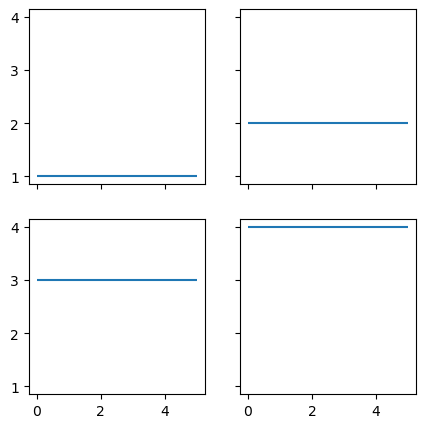

In [38]:
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5),
    sharex=True,sharey=True              # "True" Makes all the axes use the same range.
)

top_left, top_right, bottom_left, bottom_right = ax.flatten()  

top_left.hlines(y=1, xmin=0, xmax=5)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=5)
bottom_right.hlines(y=4, xmin=0, xmax=5)

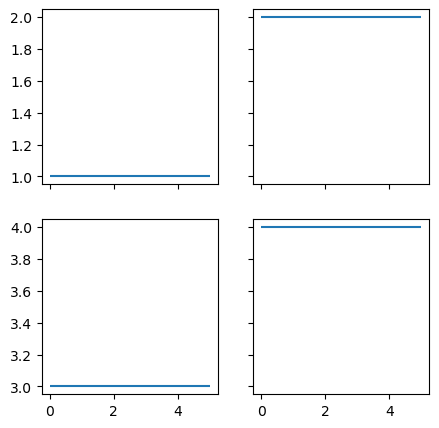

In [39]:
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5),
    sharex='col',sharey='row'              # col uses the same range for all columns
)                                          # row uses the same range for all rows


top_left, top_right, bottom_left, bottom_right = ax.flatten()  
top_left.hlines(y=1, xmin=0, xmax=5)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=5)
bottom_right.hlines(y=4, xmin=0, xmax=5)

## 5.2 Accessing all axes

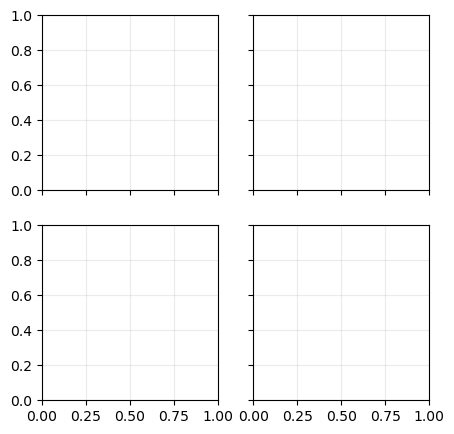

In [41]:
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5),
    sharex='col',sharey='row'       
)

# Instead of 

top_left.grid(alpha=.25)
top_right.grid(alpha=.25)
bottom_left.grid(alpha=.25)
bottom_right.grid(alpha=.25)

# just use a for loop

for a in ax.flatten():
    a.grid(alpha=.25)

# 6 Other useful plots

## 6.1 Histograms

Shows the distribution of the data

### Data

### A quick helper function

In [43]:
def get_plot_data():
    data = {}
    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv'
    data['All'] = np.loadtxt(filename, skiprows=1)
    
    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv'
    data['NUS'] = np.loadtxt(filename, skiprows=1)

    return data

### The histogram

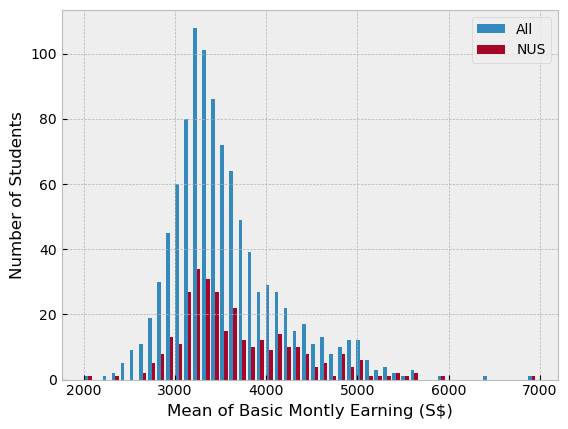

In [44]:
from matplotlib import pyplot as plt
plt.style.use('bmh')
data = get_plot_data()

plt.hist([data['All'], data['NUS']],               # Bin specifies how many bins to split the data
         bins = 50, label=['All','NUS'])
plt.xlabel('Mean of Basic Montly Earning (S$)')
plt.ylabel('Number of Students')
plt.legend()

## 6.2 Scatter plots

Created by placing a (x,y) marker at a point specified. 

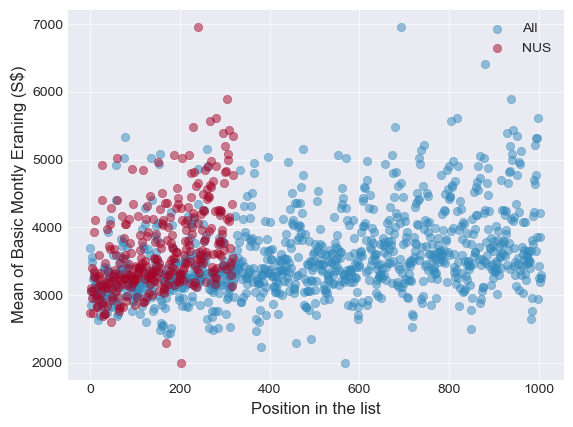

In [49]:
from matplotlib import pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')

data = get_plot_data()

for label, numbers in data.items():
    x = range(len(numbers))
    y = numbers
    plt.scatter(x,y,
               label = label, alpha =.5)

plt.xlabel('Position in the list')
plt.ylabel('Mean of Basic Montly Eraning (S$)')
plt.legend()

## 6.3 Bar charts

Use for discrete categorical data. Use barh() for horizontal bars

Text(0, 0.5, 'Number of Students')

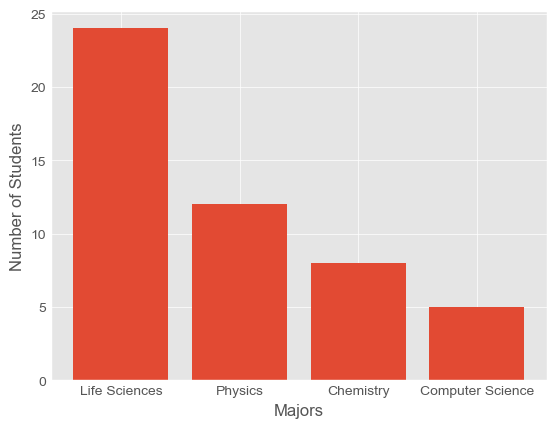

In [51]:
from matplotlib import pyplot as plt

student_numbers = {'Life Sciences': 24,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Computer Science':5
                  }

majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('ggplot')
plt.bar(majors,numbers)
plt.xlabel('Majors')
plt.ylabel('Number of Students')

Text(0.5, 0, 'Number of Students')

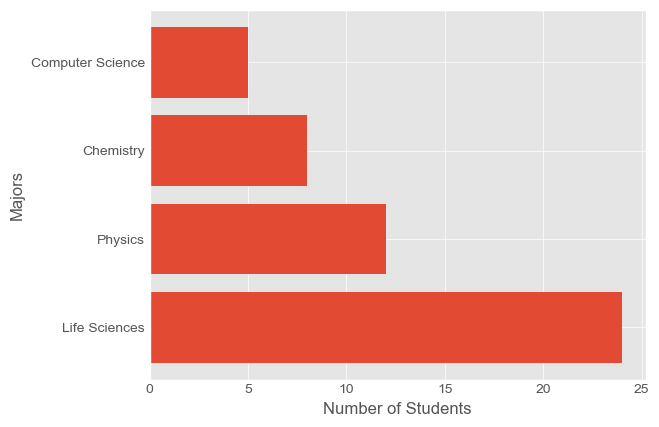

In [53]:
from matplotlib import pyplot as plt

student_numbers = {'Life Sciences': 24,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Computer Science':5
                  }

majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('ggplot')
plt.barh(majors,numbers)
plt.ylabel('Majors')
plt.xlabel('Number of Students')

## 6.4 Pie charts

Pie charts are...well pie charts. Good to show percentages I guess

Text(0.5, 1.0, 'Percentage of each major')

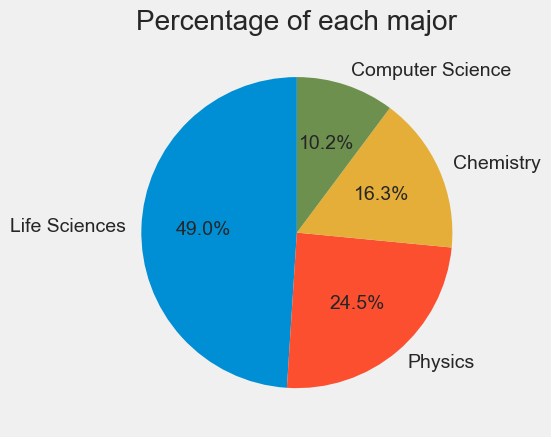

In [55]:
from matplotlib import pyplot as plt

student_numbers = {'Life Sciences': 24,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Computer Science':5
                  }

majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('fivethirtyeight')
plt.pie(numbers,
       labels=majors,
       autopct = '%1.1f%%',                     # formatting the percentages
       startangle=90)

plt.title('Percentage of each major')